In [1]:
import os

import roman
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
from Bio.SeqFeature import FeatureLocation
from pandas.api.types import CategoricalDtype


curr_path = os.path.abspath("")
root_path = os.path.abspath(os.path.join(os.path.abspath(""), "../.."))

In [2]:
def calculate_lod(qtl_res, idx, nb_strains):
    r_square = qtl_res['t-stat'][idx] ** 2 / (qtl_res['t-stat'][idx] ** 2 + nb_strains -2  )
    lod = - nb_strains * np.log(1 - r_square ) / (2 * np.log(10)) 
    return lod 
    
def get_format_table(CSV_file, snps_loc, nb_strains):
    qtl_res = pd.read_table(CSV_file)
    qtl_res = qtl_res.merge(snps_loc, on='SNP')
    qtl_res = qtl_res.rename(columns={'gene':'Condition'})
    # qtl_res['lod-value'] = [ calculate_lod(qtl_res, i, nb_strains) for i in range(len(qtl_res)) ]
    return qtl_res

def format_chrom(x):
    x = x.replace('CHR_','').replace('1000','17').replace('MT','17')
    return x

def format_roman_chrom(x):
    if 'MT' not in x : 
        rom_nb = x.replace('chr','')
        nb = roman.fromRoman(rom_nb)
        x = int(nb)
        return x 
    return x

In [3]:
CUT_annotations = pd.read_csv(f'{root_path}/data/genome_annotations/xu_2009/Xu_2009_CUTs_V64.csv')
CUT_annotations['seqid'] = CUT_annotations['seq_id'].apply(format_roman_chrom)

SUT_annotations = pd.read_csv(f'{root_path}/data/genome_annotations/xu_2009/Xu_2009_SUTs_V64.csv')
SUT_annotations['seqid'] = SUT_annotations['seq_id'].apply(format_roman_chrom)

XUT_annotations = pd.read_csv(f'{root_path}/data/genome_annotations/van_dikj_2011/van_Dijk_2011_XUTs_V64.csv')
XUT_annotations['seqid'] = XUT_annotations['seq_id'].apply(format_roman_chrom)

In [4]:
XUT_annotations

,seq_id,source,type,start,end,score,strand,phase,attributes,locus_id,seqid
0,chrI,van_Dijk_2011,ncRNA,11270,11785,3.589428,+,.,ID=1F-1;Name=XUT_1F-1;xrn1_to_WT_log2_ratio=3....,XUT_1F-1,1
1,chrI,van_Dijk_2011,ncRNA,13123,13701,3.132219,+,.,ID=1F-3;Name=XUT_1F-3;xrn1_to_WT_log2_ratio=3....,XUT_1F-3,1
2,chrI,van_Dijk_2011,ncRNA,13727,16710,3.319270,+,.,ID=1F-4;Name=XUT_1F-4;xrn1_to_WT_log2_ratio=3....,XUT_1F-4,1
3,chrI,van_Dijk_2011,ncRNA,24352,24705,2.244775,+,.,ID=1F-11;Name=XUT_1F-11;xrn1_to_WT_log2_ratio=...,XUT_1F-11,1
4,chrI,van_Dijk_2011,ncRNA,24814,25521,2.216276,+,.,ID=1F-12;Name=XUT_1F-12;xrn1_to_WT_log2_ratio=...,XUT_1F-12,1
...,...,...,...,...,...,...,...,...,...,...,...
1653,chrXVI,van_Dijk_2011,ncRNA,885565,886144,2.415608,-,.,ID=16R-404;Name=XUT_16R-404;xrn1_to_WT_log2_ra...,XUT_16R-404,16
1654,chrXVI,van_Dijk_2011,ncRNA,900108,900435,0.976314,-,.,ID=16R-410;Name=XUT_16R-410;xrn1_to_WT_log2_ra...,XUT_16R-410,16
1655,chrXVI,van_Dijk_2011,ncRNA,930065,931576,4.086093,-,.,ID=16R-419;Name=XUT_16R-419;xrn1_to_WT_log2_ra...,XUT_16R-419,16
1656,chrXVI,van_Dijk_2011,ncRNA,935864,937882,3.549176,-,.,ID=16R-422;Name=XUT_16R-422;xrn1_to_WT_log2_ra...,XUT_16R-422,16


In [5]:
LD_blocks = pd.read_csv(f'{root_path}/data/genome_annotations/LD_blocks_annotations.csv')
LD_blocks['seqid'] = LD_blocks['seqid'].apply(format_chrom).astype(int)

In [6]:
LD_blocks[LD_blocks['strand'] == '+']

,seqid,source,type,start,end,score,strand,phase,attributes
0,1,LD information,LD block,27498,27561,1,+,.,Name=CHR_1_10-11
1,1,LD information,LD block,27822,28975,1,+,.,Name=CHR_1_13-19
2,1,LD information,LD block,37409,37478,1,+,.,Name=CHR_1_31-32
3,1,LD information,LD block,51462,52667,1,+,.,Name=CHR_1_38-40
4,1,LD information,LD block,59265,60165,1,+,.,Name=CHR_1_42-43
...,...,...,...,...,...,...,...,...,...
1742,17,LD information,LD block,19256,34281,1,+,.,Name=CHR_MT_12027-12031
1743,17,LD information,LD block,40373,40387,1,+,.,Name=CHR_MT_12033-12034
1744,17,LD information,LD block,44425,44429,1,+,.,Name=CHR_MT_12035-12036
1745,17,LD information,LD block,44456,44467,1,+,.,Name=CHR_MT_12037-12038


In [7]:
### Inputs
#### Genotype matrix
genotype_matrix = pd.read_csv(f'{root_path}/data/genotype_information/piQTL_genotype_matrix_dec2022.txt')
nb_strains = len(genotype_matrix.columns) - 1

#### snps location
snps_loc = pd.read_csv(f'{root_path}/data/genotype_information/snps_annotations_genome-version-3-64-1.txt').rename(columns={"snp_id":"SNP"})
snps_loc['SNP'] = snps_loc['SNP'].astype(int)
snps_loc['position'] = snps_loc['position'].astype(int)

In [8]:
all_GWAS_Fluconazole = get_format_table(f'{root_path}/data/gwas_results/Fluconazole_pval_results.txt', snps_loc, nb_strains)
GWAS_Fluconazole_36H = all_GWAS_Fluconazole[all_GWAS_Fluconazole['Condition'] == '36h-Fluconazole'].reset_index(drop=True)
GWAS_Fluconazole_36H = GWAS_Fluconazole_36H.rename(columns={'beta':'EFFECTSIZE', 'p-value':'P', 'chrom':'CHR', 'position':'BP', 'name':'GENE'})
GWAS_Fluconazole_36H['CHR'] = GWAS_Fluconazole_36H['CHR'].apply(format_chrom).astype(int)
GWAS_Fluconazole_36H.to_csv(f'{curr_path}/zoomlocus_inputs/GWAS_Fluconazole_36H.txt', index=False)

all_GWAS_Fluconazole = get_format_table(f'{root_path}/data/gwas_results/Fluconazole_pval_results_full_GWAS.txt', snps_loc, nb_strains)
GWAS_Fluconazole_36H_full = all_GWAS_Fluconazole[all_GWAS_Fluconazole['Condition'] == '36h-Fluconazole'].reset_index(drop=True)
GWAS_Fluconazole_36H_full = GWAS_Fluconazole_36H_full.rename(columns={'beta':'EFFECTSIZE', 'p-value':'P', 'chrom':'CHR', 'position':'BP', 'name':'GENE'})
GWAS_Fluconazole_36H_full['CHR'] = GWAS_Fluconazole_36H_full['CHR'].apply(format_chrom).astype(int)
GWAS_Fluconazole_36H_full.to_csv(f'{curr_path}/zoomlocus_inputs/GWAS_Fluconazole_36H_full_GWAS.txt', index=False)

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/work/data/gwas_results/Fluconazole_pval_results.txt'

In [ ]:
noDrug = pd.read_csv(f'{root_path}/data/QTL/ERG11_PIS1_MTX_noDrug_avg_logratio_Fitness_minus_ref.csv')
noDrug.to_csv(f'{curr_path}/zoomlocus_inputs/ERG11_PIS1_MTX_noDrug.txt', index=False)

In [ ]:
gene_annotations = pd.read_csv(f'{root_path}/data/genome_annotations/sgd_database/orf_coding_R64-3-1.csv').rename(columns={"name":"Gene", "chrom":"Chrom", "start":"Start", "end":"End", "genome_annotations":"Coding"})
gene_annotations['Chrom'] = gene_annotations['Chrom'].apply(format_chrom)
gene_annotations.to_csv(f'{curr_path}/zoomlocus_inputs/yeast_genes.txt', index=False)

In [ ]:
Fluc_piQTLs = pd.read_csv(f'{root_path}/data/QTL/ERG11_PIS1_MTX_Fluconazole_avg_logratio_Fitness_minus_ref.csv') # a data.frame (or a list of data.frames) with the columns CHR, BP, SNP, and P
Fluc_piQTLs.to_csv(f'{curr_path}/zoomlocus_inputs/ERG11_PIS1_MTX_Fluconazole.txt', index=False)

In [ ]:
Metformin_piQTLs = pd.read_csv(f'{root_path}/data/QTL/SRO9_GIS2_MTX_Metformin_avg_logratio_Fitness_minus_ref.csv') # a data.frame (or a list of data.frames) with the columns CHR, BP, SNP, and P

In [ ]:
chr_order = CategoricalDtype(
    [
        'CHR_1',
        'CHR_2',
        'CHR_3',
        'CHR_4',
        'CHR_5',
        'CHR_6',
        'CHR_7',
        'CHR_8',
        'CHR_9',
        'CHR_10',
        'CHR_11',
        'CHR_12',
        'CHR_13',
        'CHR_14',
        'CHR_15',
        'CHR_16',
        'CHR_MT'
    ],
    ordered=True
)

def get_chr_limits(snp_position):
    #### Delimitations of chromosomes based on SNPs index
    chr_limits = []
    for chr in np.unique(snp_position['chrom'].values):
        TMP = snp_position[snp_position['chrom'] == chr]
        chr_limits.append([chr, int(TMP['snp_id'].describe()['min']), int(TMP['snp_id'].describe()['max']), int(TMP['position'].describe()['min']), int(TMP['position'].describe()['max'])])
    chr_limit_table = pd.DataFrame(chr_limits, columns=['CHR', 'SNP_IDX_FIRST', 'SNP_IDX_LAST', 'SNP_POS_FIRST', 'SNP_POS_LAST']).sort_values('SNP_IDX_FIRST')
    chr_limit_table['CHR'] = chr_limit_table['CHR'].astype(chr_order)
    print(chr_limit_table)
    return chr_limit_table

In [ ]:
snp_position = pd.read_csv(f'{root_path}/data/genotype_information/snps_annotations_genome-version-3-64-1.txt')
chr_limits = get_chr_limits(snp_position)
chr_limits['CHR_SIZE'] = chr_limits['SNP_POS_LAST'] - chr_limits['SNP_POS_FIRST']

       CHR  SNP_IDX_FIRST  SNP_IDX_LAST  SNP_POS_FIRST  SNP_POS_LAST
0    CHR_1              1           181           1025        223059
8    CHR_2            182           886           7366        804707
9    CHR_3            887          1252            450        316065
10   CHR_4           1253          2767           2228       1523587
11   CHR_5           2768          3590           8786        566755
12   CHR_6           3591          3856          12139        270132
13   CHR_7           3857          4841            331       1073937
14   CHR_8           4842          5434          13662        556515
15   CHR_9           5435          5982          19515        437999
1   CHR_10           5983          6599          26272        745651
2   CHR_11           6600          7419            833        666544
3   CHR_12           7420          8410          11408       1062523
4   CHR_13           8411          9256           8208        914897
5   CHR_14           9257         

/tmp/ipykernel_53578/2276731430.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data1['neg_log10_pval'] = -1 * np.log10(subset_data1['P'])
/tmp/ipykernel_53578/2276731430.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data2['neg_log10_pval'] = -1 * np.log10(subset_data2['P'])


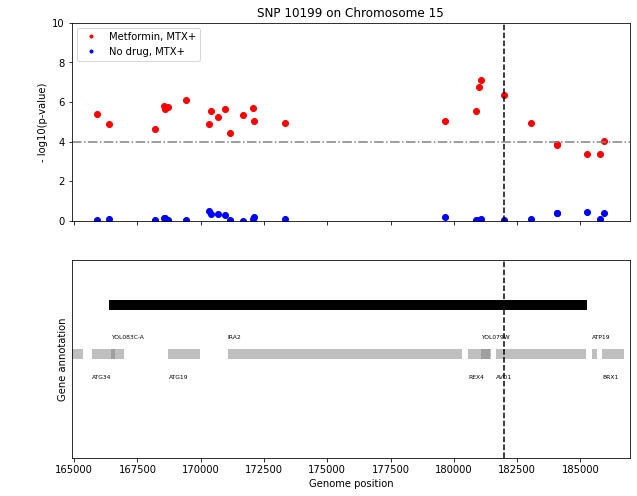

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set locus region
locus_chromosome = 15
locus_start = 181986 - 20000
locus_end = 181986 + 5000

# Subset data to locus region
subset_data1 = Metformin_piQTLs[(Metformin_piQTLs['CHR'] == locus_chromosome) & (Metformin_piQTLs['BP'] >= locus_start) & (Metformin_piQTLs['BP'] <= locus_end)]
subset_data1['neg_log10_pval'] = -1 * np.log10(subset_data1['P'])

subset_data2 = noDrug[(noDrug['CHR'] == locus_chromosome) & (noDrug['BP'] >= locus_start) & (noDrug['BP'] <= locus_end)]
subset_data2['neg_log10_pval'] = -1 * np.log10(subset_data2['P'])

# subset_data3 = GWAS_Fluconazole_36H[(GWAS_Fluconazole_36H['CHR'] == locus_chromosome) & (GWAS_Fluconazole_36H['BP'] >= locus_start) & (GWAS_Fluconazole_36H['BP'] <= locus_end)]
# subset_data3['neg_log10_pval'] = -1 * np.log10(subset_data3['P'])


# Plot Manhattan plot
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)
ax1.scatter(subset_data1['BP'], subset_data1['neg_log10_pval'], color='red')
# ax1.plot(subset_data1['BP'], subset_data1['neg_log10_pval'], color='red')
# ax1.scatter(subset_data3['BP'], subset_data3['neg_log10_pval'], color='blue')
# ax1.plot(subset_data3['BP'], subset_data3['neg_log10_pval'], color='blue')
ax1.scatter(subset_data2['BP'], subset_data2['neg_log10_pval'], color='blue')
# ax1.plot(subset_data2['BP'], subset_data2['neg_log10_pval'], color='grey')

ax1.axvline(x=181986, linestyle='--', color='black')
ax1.axhline(y=4, linestyle='-.', color='grey')
ax1.set_ylim([0,10])
ax1.set_ylabel('- log10(p-value)')
ax1.set_title('SNP 10199 on Chromosome 15')


ax2.axvline(x=181986, linestyle='--', color='black')
genes = gene_annotations[(gene_annotations['Chrom'] == '15') & (gene_annotations['Start'] >= locus_start) & (gene_annotations['End'] <= locus_end)]
LDs = LD_blocks[(LD_blocks['seqid'] == locus_chromosome) & (LD_blocks['start'] >= locus_start) & (LD_blocks['end'] <= locus_end)]

# Extract gene information
for idx in genes.index : 
    chrom = int(genes['Chrom'][idx])
    start = int(genes['Start'][idx])
    end = int(genes['End'][idx])
    gene = genes['Gene'][idx]
    strand = 1

    # Create a FeatureLocation object for the gene
    gene_location = FeatureLocation(start, end, strand=strand)

    # Calculate gene length
    gene_length = len(gene_location)

    # Add gene annotation to the second subplot
    ax2.add_patch(plt.Rectangle((start, 0.5), gene_length, 0.05, facecolor="gray", alpha=0.5))
    if idx % 2 == 0 : 
        ax2.annotate(gene, (start, 0.5), xytext=(start,0.6) , xycoords='data', size=6)
    else : 
        ax2.annotate(gene, (start, 0.5), xytext=(start,0.4) , xycoords='data', size=6)

for idx in LDs.index : 
    chrom = int(LDs['seqid'][idx])
    start = int(LDs['start'][idx])
    end = int(LDs['end'][idx])
    strand = 1

    # Create a FeatureLocation object for the gene
    gene_location = FeatureLocation(start, end, strand=strand)

    # Calculate gene length
    gene_length = len(gene_location)

    ax2.add_patch(plt.Rectangle((start, 0.75), gene_length, 0.05, facecolor="black"))


# Set x-axis limits and labels for the second subplot
ax2.set_xlabel("Genome position")
ax2.set_ylabel("Gene annotation")

ax2.set_yticks([])
ax2.set_yticklabels([])

custom = [Line2D([], [], marker='.', color='red', linestyle='None'),
        # Line2D([], [], marker='.', color='blue', linestyle='None'),
        Line2D([], [], marker='.', color='blue', linestyle='None')
]

ax1.legend(custom, ['Metformin, MTX+', 'No drug, MTX+'], loc='upper left')

plt.show()

fig.savefig(f'{root_path}/figures/supp_figures/Metformin-piQTL_example_final.eps', dpi=300)


/tmp/ipykernel_128845/3327246176.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data1['neg_log10_pval'] = -1 * np.log10(subset_data1['P'])
/tmp/ipykernel_128845/3327246176.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data2['neg_log10_pval'] = -1 * np.log10(subset_data2['P'])
/tmp/ipykernel_128845/3327246176.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

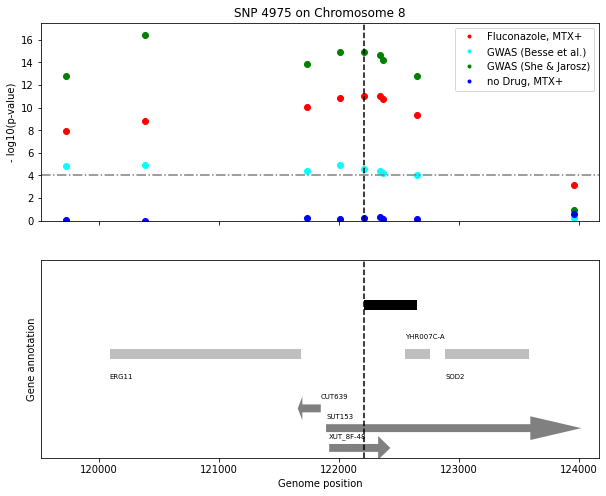

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set locus region
locus_chromosome = 8
locus_start = 122207 - 2500
locus_end = 122207 + 2000

# Subset data to locus region
subset_data1 = Fluc_piQTLs[(Fluc_piQTLs['CHR'] == locus_chromosome) & (Fluc_piQTLs['BP'] >= locus_start) & (Fluc_piQTLs['BP'] <= locus_end)]
subset_data1['neg_log10_pval'] = -1 * np.log10(subset_data1['P'])

subset_data2 = noDrug[(noDrug['CHR'] == locus_chromosome) & (noDrug['BP'] >= locus_start) & (noDrug['BP'] <= locus_end)]
subset_data2['neg_log10_pval'] = -1 * np.log10(subset_data2['P'])

subset_data3 = GWAS_Fluconazole_36H[(GWAS_Fluconazole_36H['CHR'] == locus_chromosome) & (GWAS_Fluconazole_36H['BP'] >= locus_start) & (GWAS_Fluconazole_36H['BP'] <= locus_end)]
subset_data3['neg_log10_pval'] = -1 * np.log10(subset_data3['P'])

subset_data4 = GWAS_Fluconazole_36H_full[(GWAS_Fluconazole_36H_full['CHR'] == locus_chromosome) & (GWAS_Fluconazole_36H_full['BP'] >= locus_start) & (GWAS_Fluconazole_36H_full['BP'] <= locus_end)]
subset_data4['neg_log10_pval'] = -1 * np.log10(subset_data4['P'])


# Plot Manhattan plot
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)
ax1.scatter(subset_data1['BP'], subset_data1['neg_log10_pval'], color='red')

ax1.scatter(subset_data4['BP'], subset_data4['neg_log10_pval'], color='green')
ax1.scatter(subset_data3['BP'], subset_data3['neg_log10_pval'], color='cyan')

ax1.scatter(subset_data2['BP'], subset_data2['neg_log10_pval'], color='blue')


ax1.axvline(x=122207, linestyle='--', color='black')
ax1.axhline(y=4, linestyle='-.', color='grey')
ax1.set_ylim([0,17.5])
ax1.set_ylabel('- log10(p-value)')
ax1.set_title('SNP 4975 on Chromosome 8')


ax2.axvline(x=122207, linestyle='--', color='black')
genes = gene_annotations[(gene_annotations['Chrom'] == '8') & (gene_annotations['Start'] >= locus_start) & (gene_annotations['End'] <= locus_end)]
LDs = LD_blocks[(LD_blocks['seqid'] == locus_chromosome) & (LD_blocks['start'] >= locus_start) & (LD_blocks['end'] <= locus_end)]
CUTs = CUT_annotations[(CUT_annotations['seqid'] == locus_chromosome) & (CUT_annotations['start'] >= locus_start) & (CUT_annotations['end'] <= locus_end)]
SUTs = SUT_annotations[(SUT_annotations['seqid'] == locus_chromosome) & (SUT_annotations['start'] >= locus_start) & (SUT_annotations['end'] <= locus_end)]
XUTs = XUT_annotations[(XUT_annotations['seqid'] == locus_chromosome) & (XUT_annotations['start'] >= locus_start) & (XUT_annotations['end'] <= locus_end)]


# Extract gene information
for idx in genes.index : 
    chrom = int(genes['Chrom'][idx])
    start = int(genes['Start'][idx])
    end = int(genes['End'][idx])
    gene = genes['Gene'][idx]
    strand = 1

    # Create a FeatureLocation object for the gene
    gene_location = FeatureLocation(start, end, strand=strand)

    # Calculate gene length
    gene_length = len(gene_location)

    # Add gene annotation to the second subplot
    ax2.add_patch(plt.Rectangle((start, 0.5), gene_length, 0.05, facecolor="gray", alpha=0.5))
    if idx % 2 == 0 : 
        ax2.annotate(gene, (start, 0.5), xytext=(start,0.6) , xycoords='data', size=7)
    else : 
        ax2.annotate(gene, (start, 0.5), xytext=(start,0.4) , xycoords='data', size=7)

for idx in LDs.index : 
    chrom = int(LDs['seqid'][idx])
    start = int(LDs['start'][idx])
    end = int(LDs['end'][idx])

    strand = 1

    # Create a FeatureLocation object for the gene
    gene_location = FeatureLocation(start, end, strand=strand)

    # Calculate gene length
    gene_length = len(gene_location)

    ax2.add_patch(plt.Rectangle((start, 0.75), gene_length, 0.05, facecolor="black"))

for idx in CUTs.index : 
    chrom = int(CUTs['seqid'][idx])
    start = int(CUTs['start'][idx])
    end = int(CUTs['end'][idx])
    strand = CUTs['strand'][idx]
    cut =  CUTs['locus_id'][idx]
    if strand == '+' :
        strand = 1 
    else : 
        strand = -1

    # Create a FeatureLocation object for the gene
    gene_location = FeatureLocation(start, end, strand=strand)

    # Calculate gene length
    gene_length = len(gene_location)

    if strand == 1:
        ax2.add_patch(plt.Arrow(start, 0.25, gene_length, 0, 0.2, facecolor="grey"))
    else : 
        ax2.add_patch(plt.Arrow(start, 0.25, - gene_length, 0, 0.2, facecolor="grey"))
    ax2.annotate(cut, (start, 0.25), xytext=(start,0.30) , xycoords='data', size=7)


for idx in SUTs.index : 
    chrom = int(SUTs['seqid'][idx])
    start = int(SUTs['start'][idx])
    end = int(SUTs['end'][idx])
    strand = SUTs['strand'][idx]
    sut =  SUTs['locus_id'][idx]
    if strand == '+' :
        strand = 1 
    else : 
        strand = -1

    # Create a FeatureLocation object for the gene
    gene_location = FeatureLocation(start, end, strand=strand)

    # Calculate gene length
    gene_length = len(gene_location)

    if strand == 1:
        ax2.add_patch(plt.Arrow(start, 0.15, gene_length, 0, 0.2, facecolor="grey"))
    else : 
        ax2.add_patch(plt.Arrow(start, 0.15, - gene_length, 0, 0.2, facecolor="grey"))
    ax2.annotate(sut, (start, 0.25), xytext=(start,0.20) , xycoords='data', size=7)

for idx in XUTs.index : 
    chrom = int(XUTs['seqid'][idx])
    start = int(XUTs['start'][idx])
    end = int(XUTs['end'][idx])
    strand = XUTs['strand'][idx]
    xut =  XUTs['locus_id'][idx]
    if strand == '+' :
        strand = 1 
    else : 
        strand = -1

    # Create a FeatureLocation object for the gene
    gene_location = FeatureLocation(start, end, strand=strand)

    # Calculate gene length
    gene_length = len(gene_location)

    if strand == 1:
        ax2.add_patch(plt.Arrow(start, 0.05, gene_length, 0, 0.2, facecolor="grey"))
    else : 
        ax2.add_patch(plt.Arrow(start, 0.05, - gene_length, 0, 0.2, facecolor="grey"))
    ax2.annotate(xut, (start, 0.25), xytext=(start,0.10) , xycoords='data', size=7)


# Set x-axis limits and labels for the second subplot
ax2.set_xlabel("Genome position")
ax2.set_ylabel("Gene annotation")

ax2.set_yticks([])
ax2.set_yticklabels([])

custom = [Line2D([], [], marker='.', color='red', linestyle='None'),
        Line2D([], [], marker='.', color='cyan', linestyle='None'),
        Line2D([], [], marker='.', color='green', linestyle='None'),
        Line2D([], [], marker='.', color='blue', linestyle='None')
]

ax1.legend(custom, ['Fluconazole, MTX+', 'GWAS (Besse et al.)', 'GWAS (She & Jarosz)', 'no Drug, MTX+'], loc='upper right')

plt.show()

fig.savefig(f'{root_path}/figures/supp_figures/cis-piQTL_UTs_zoom.eps', dpi=300)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set locus region
locus_chromosome = 8
locus_start = 122207 - 10000
locus_end = 122207 + 10000

# Subset data to locus region
subset_data1 = Fluc_piQTLs[(Fluc_piQTLs['CHR'] == locus_chromosome) & (Fluc_piQTLs['BP'] >= locus_start) & (Fluc_piQTLs['BP'] <= locus_end)]
subset_data1['neg_log10_pval'] = -1 * np.log10(subset_data1['P'])

subset_data2 = noDrug[(noDrug['CHR'] == locus_chromosome) & (noDrug['BP'] >= locus_start) & (noDrug['BP'] <= locus_end)]
subset_data2['neg_log10_pval'] = -1 * np.log10(subset_data2['P'])

subset_data3 = GWAS_Fluconazole_36H[(GWAS_Fluconazole_36H['CHR'] == locus_chromosome) & (GWAS_Fluconazole_36H['BP'] >= locus_start) & (GWAS_Fluconazole_36H['BP'] <= locus_end)]
subset_data3['neg_log10_pval'] = -1 * np.log10(subset_data3['P'])

subset_data4 = GWAS_Fluconazole_36H_full[(GWAS_Fluconazole_36H_full['CHR'] == locus_chromosome) & (GWAS_Fluconazole_36H_full['BP'] >= locus_start) & (GWAS_Fluconazole_36H_full['BP'] <= locus_end)]
subset_data4['neg_log10_pval'] = -1 * np.log10(subset_data4['P'])


# Plot Manhattan plot
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)
ax1.scatter(subset_data1['BP'], subset_data1['neg_log10_pval'], color='red')

ax1.scatter(subset_data4['BP'], subset_data4['neg_log10_pval'], color='green')

ax1.scatter(subset_data3['BP'], subset_data3['neg_log10_pval'], color='cyan')

ax1.scatter(subset_data2['BP'], subset_data2['neg_log10_pval'], color='blue')


ax1.axvline(x=122207, linestyle='--', color='black')
ax1.axhline(y=4, linestyle='-.', color='grey')
ax1.set_ylim([0,17.5])
ax1.set_ylabel('- log10(p-value)')
ax1.set_title('SNP 4975 on Chromosome 8')


ax2.axvline(x=122207, linestyle='--', color='black')
genes = gene_annotations[(gene_annotations['Chrom'] == '8') & (gene_annotations['Start'] >= locus_start) & (gene_annotations['End'] <= locus_end)]
LDs = LD_blocks[(LD_blocks['seqid'] == locus_chromosome) & (LD_blocks['start'] >= locus_start) & (LD_blocks['end'] <= locus_end)]

# Extract gene information
for idx in genes.index : 
    chrom = int(genes['Chrom'][idx])
    start = int(genes['Start'][idx])
    end = int(genes['End'][idx])
    gene = genes['Gene'][idx]
    strand = 1

    # Create a FeatureLocation object for the gene
    gene_location = FeatureLocation(start, end, strand=strand)

    # Calculate gene length
    gene_length = len(gene_location)

    # Add gene annotation to the second subplot
    ax2.add_patch(plt.Rectangle((start, 0.5), gene_length, 0.05, facecolor="gray", alpha=0.5))
    if idx % 2 == 0 : 
        ax2.annotate(gene, (start, 0.5), xytext=(start,0.6) , xycoords='data', size=7)
    else : 
        ax2.annotate(gene, (start, 0.5), xytext=(start,0.4) , xycoords='data', size=7)

for idx in LDs.index : 
    chrom = int(LDs['seqid'][idx])
    start = int(LDs['start'][idx])
    end = int(LDs['end'][idx])
    strand = 1

    # Create a FeatureLocation object for the gene
    gene_location = FeatureLocation(start, end, strand=strand)

    # Calculate gene length
    gene_length = len(gene_location)

    ax2.add_patch(plt.Rectangle((start, 0.75), gene_length, 0.05, facecolor="black"))


# Set x-axis limits and labels for the second subplot
ax2.set_xlabel("Genome position")
ax2.set_ylabel("Gene annotation")

ax2.set_yticks([])
ax2.set_yticklabels([])

custom = [Line2D([], [], marker='.', color='red', linestyle='None'),
        Line2D([], [], marker='.', color='cyan', linestyle='None'),
        Line2D([], [], marker='.', color='green', linestyle='None'),
        Line2D([], [], marker='.', color='blue', linestyle='None')
]

ax1.legend(custom, ['Fluconazole, MTX+', 'GWAS (Besse et al.)', 'GWAS (She & Jarosz)', 'no Drug, MTX+'], loc='upper right')

plt.show()

# fig.savefig('../manuscript/figures/cis-piQTL_example_final.eps', dpi=300)
# ToDo: output error

SyntaxError: invalid syntax (335607211.py, line 45)

/tmp/ipykernel_53578/525303939.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data1['neg_log10_pval'] = -1 * np.log10(subset_data1['P'])
/tmp/ipykernel_53578/525303939.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data2['neg_log10_pval'] = -1 * np.log10(subset_data2['P'])
/tmp/ipykernel_53578/525303939.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

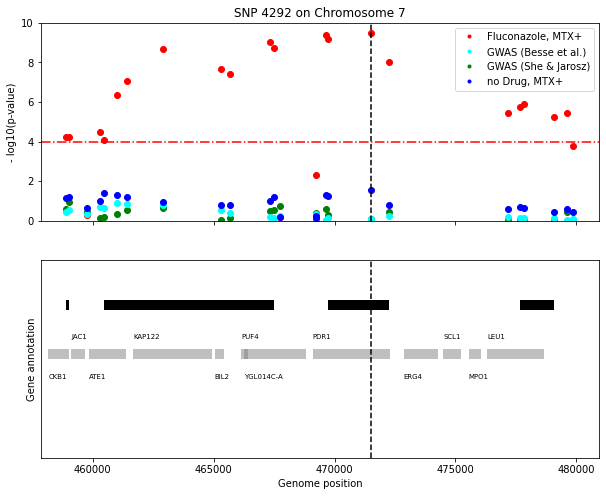

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set locus region
locus_chromosome = 7
locus_start = 471518 - 15000
locus_end = 471518 + 10000

# Subset data to locus region
subset_data1 = Fluc_piQTLs[(Fluc_piQTLs['CHR'] == locus_chromosome) & (Fluc_piQTLs['BP'] >= locus_start) & (Fluc_piQTLs['BP'] <= locus_end)]
subset_data1['neg_log10_pval'] = -1 * np.log10(subset_data1['P'])

subset_data2 = noDrug[(noDrug['CHR'] == locus_chromosome) & (noDrug['BP'] >= locus_start) & (noDrug['BP'] <= locus_end)]
subset_data2['neg_log10_pval'] = -1 * np.log10(subset_data2['P'])

subset_data3 = GWAS_Fluconazole_36H[(GWAS_Fluconazole_36H['CHR'] == locus_chromosome) & (GWAS_Fluconazole_36H['BP'] >= locus_start) & (GWAS_Fluconazole_36H['BP'] <= locus_end)]
subset_data3['neg_log10_pval'] = -1 * np.log10(subset_data3['P'])

subset_data4 = GWAS_Fluconazole_36H_full[(GWAS_Fluconazole_36H_full['CHR'] == locus_chromosome) & (GWAS_Fluconazole_36H_full['BP'] >= locus_start) & (GWAS_Fluconazole_36H_full['BP'] <= locus_end)]
subset_data4['neg_log10_pval'] = -1 * np.log10(subset_data4['P'])


# Plot Manhattan plot
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)
ax1.scatter(subset_data1['BP'], subset_data1['neg_log10_pval'], color='red')

ax1.scatter(subset_data4['BP'], subset_data4['neg_log10_pval'], color='green')
ax1.scatter(subset_data3['BP'], subset_data3['neg_log10_pval'], color='cyan')

ax1.scatter(subset_data2['BP'], subset_data2['neg_log10_pval'], color='blue')

ax1.axvline(x=471518, linestyle='--', color='black')
ax1.axhline(y=4, linestyle='-.', color='red')
ax1.set_ylim([0,10])
ax1.set_ylabel('- log10(p-value)')
ax1.set_title('SNP 4292 on Chromosome 7')


ax2.axvline(x=471518, linestyle='--', color='black')
genes = gene_annotations[(gene_annotations['Chrom'] == '7') & (gene_annotations['Start'] >= locus_start) & (gene_annotations['End'] <= locus_end)]
LDs = LD_blocks[(LD_blocks['seqid'] == locus_chromosome) & (LD_blocks['start'] >= locus_start) & (LD_blocks['end'] <= locus_end)]

# Extract gene information
for idx in genes.index : 
    chrom = int(genes['Chrom'][idx])
    start = int(genes['Start'][idx])
    end = int(genes['End'][idx])
    gene = genes['Gene'][idx]
    strand = 1

    # Create a FeatureLocation object for the gene
    gene_location = FeatureLocation(start, end, strand=strand)

    # Calculate gene length
    gene_length = len(gene_location)

    # Add gene annotation to the second subplot
    ax2.add_patch(plt.Rectangle((start, 0.5), gene_length, 0.05, facecolor="gray", alpha=0.5))
    if idx % 2 == 0 : 
        ax2.annotate(gene, (start, 0.5), xytext=(start,0.6) , xycoords='data', size=7)
    else : 
        ax2.annotate(gene, (start, 0.5), xytext=(start,0.4) , xycoords='data', size=7)

for idx in LDs.index : 
    chrom = int(LDs['seqid'][idx])
    start = int(LDs['start'][idx])
    end = int(LDs['end'][idx])
    strand = 1

    # Create a FeatureLocation object for the gene
    gene_location = FeatureLocation(start, end, strand=strand)

    # Calculate gene length
    gene_length = len(gene_location)

    ax2.add_patch(plt.Rectangle((start, 0.75), gene_length, 0.05, facecolor="black"))


# Set x-axis limits and labels for the second subplot
ax2.set_xlabel("Genome position")
ax2.set_ylabel("Gene annotation")

ax2.set_yticks([])
ax2.set_yticklabels([])

custom = [Line2D([], [], marker='.', color='red', linestyle='None'),
        Line2D([], [], marker='.', color='cyan', linestyle='None'),
        Line2D([], [], marker='.', color='green', linestyle='None'),
        Line2D([], [], marker='.', color='blue', linestyle='None')
]

ax1.legend(custom, ['Fluconazole, MTX+', 'GWAS (Besse et al.)', 'GWAS (She & Jarosz)', 'no Drug, MTX+'], loc='upper right')

plt.show()

fig.savefig(f'{root_path}/figures/supp_figures/trans-piQTL_example_final.eps', dpi=300)


In [ ]:
stacked = LDs.set_index('SNP').iloc[3857:4841, 3857:4841].stack()
df = stacked.reset_index(name='R2').rename(columns={'SNP':'SNP_A', 'level_1':'SNP_B'})
df['SNP_B'] = df['SNP_B'].astype(int)
df = df.merge(snp_position[['snp_id', 'chrom', 'position']], left_on='SNP_B', right_on='snp_id').rename(columns={"chrom":'CHR_B', 'position':"BP_B"}).drop(columns='snp_id')
df = df.merge(snp_position[['snp_id', 'chrom', 'position']], left_on='SNP_A', right_on='snp_id').rename(columns={"chrom":'CHR_A', 'position':"BP_A"}).drop(columns='snp_id')

In [ ]:
df.to_csv(f'{curr_path}/zoomlocus_inputs/LD_CHR7.txt', index=False)

In [ ]:
stacked = LDs.set_index('SNP').iloc[4841:5434, 4841:5434].stack()
df = stacked.reset_index(name='R2').rename(columns={'SNP':'SNP_A', 'level_1':'SNP_B'})
df['SNP_B'] = df['SNP_B'].astype(int)
df = df.merge(snp_position[['snp_id', 'chrom', 'position']], left_on='SNP_B', right_on='snp_id').rename(columns={"chrom":'CHR_B', 'position':"BP_B"}).drop(columns='snp_id')
df = df.merge(snp_position[['snp_id', 'chrom', 'position']], left_on='SNP_A', right_on='snp_id').rename(columns={"chrom":'CHR_A', 'position':"BP_A"}).drop(columns='snp_id')

In [ ]:
df.to_csv(f'{curr_path}/zoomlocus_inputs/LD_CHR8.txt', index=False)